# Skydiver

In course notebook 6 you have seen numerical differentiation and solving ODEs explcitely. In notebook 7 you have seen how to solve ODEs analytically with Sympy. In this class we will solve ODEs again numerically by using libraries. We will then discuss an application: the equation of motion that describes the trajectory of a skydiver.  

## Solving ODEs with libraries
### Revisit ODE from course notebook 5

We were solving this ODE:
$$\frac{dy}{dx} = 2x $$ 

#### Revisit the Euler step solution from 

In [1]:
%pylab ipympl

Populating the interactive namespace from numpy and matplotlib


In [6]:
y=[]; y.append(0)
x=[]; x.append(0)

In [7]:
rhs_f = lambda x: 2*x
x_thing = x[0]; y_thing = y[0]

In [8]:
h=2.; x_end = 4.
while x_thing <= x_end+h:
    y_thing = y_thing + h * rhs_f(x_thing)
    x_thing += h
    print(x_thing,y_thing)
    x.append(x_thing); y.append(y_thing)

2.0 0.0
4.0 8.0
6.0 24.0
8.0 48.0


The exact answer is of course $x^2$. The numerical solution in this case systematically undershoots.

In [10]:
close(1);figure(1)
plot(x,y,'o-',label='numeric, Euler')
plot(x,array(x)**2,'--',label='analytic')
legend();xlabel('$x$'),ylabel('$y(x)$')

FigureCanvasNbAgg()

(Text(0.5, 0, '$x$'), Text(0, 0.5, '$y(x)$'))

### Integration with `sciy.integrate.odeint`

In [11]:
from scipy import integrate

A reminder: All `scipy` libraries can of course be found on the [Scipy web page](http://www.scipy.org) with examples and further explanations, including references into the inner workings, and what methods are used in detail.

However, the same information as on the web page can be found in the docstring! The advantage: the docstring is definitely describing (by design) the correct version and flavour of the library you are using.

In [20]:
integrate.odeint?

Signature:
integrate.odeint(
    ['func', 'y0', 't', 'args=()', 'Dfun=None', 'col_deriv=0', 'full_output=0', 'ml=None', 'mu=None', 'rtol=None', 'atol=None', 'tcrit=None', 'h0=0.0', 'hmax=0.0', 'hmin=0.0', 'ixpr=0', 'mxstep=0', 'mxhnil=0', 'mxordn=12', 'mxords=5', 'printmessg=0', 'tfirst=False'],
)
Docstring:
Integrate a system of ordinary differential equations.

.. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
          differential equation.

Solve a system of ordinary differential equations using lsoda from the
FORTRAN library odepack.

Solves the initial value problem for stiff or non-stiff systems
of first order ode-s::

    dy/dt = func(y, t, ...)  [or func(t, y, ...)]

where y can be a vector.

.. note:: By default, the required order of the first two arguments of
          `func` are in the opposite order of the arguments in the system
          definition function used by the `scipy.integrate.ode` class and
          the function `scipy.integrate.solve_ivp`. 

In [6]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
rhs_ff = lambda y,x: 2*x   # the RHS as in the mathematical version of the ODE
x = np.linspace(0,7,3)        # setup the x array along we are going to integrate
y0=0                       # initial condition for y, specify y(x[0])

In [10]:
yy = integrate.odeint(rhs_ff,y0,x)   # this carries out the actual integration
print(yy)

[[ 0.        ]
 [12.25000002]
 [49.00000002]]


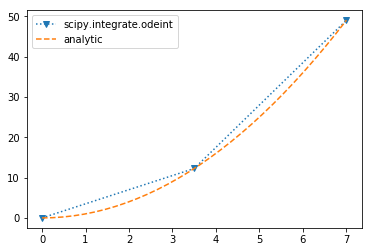

In [9]:
xpl = np.linspace(0,7,30)     # an x-array just for plotting so that we get 
                           # high-resolution  analytical plot line
plt.plot(x,yy,'v:',label='scipy.integrate.odeint')
plt.plot(xpl,np.array(xpl)**2,'--',label='analytic')
plt.legend()

### Try another solver
The documentation says _For new code, use_ `scipy.integrate.solve_ivp` _to solve a differential equation._ OK, ... let's try that ...

In [56]:
rhs_ff_sivp = lambda x,y: 2*x   # note that for this solver the calling 
                                # sequence is different than for odeint!
sol = integrate.solve_ivp(rhs_ff_sivp,[0,7],[0]) # note the different call 
                                                 # arguments compared to odeing

This libary provides a range of solvers, including the _LSODA_ solver used in `odeint`. Try the option `method='LSODA'`.

In [57]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 20
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 8.33333330e-04, 1.66666666e-03, 3.33333332e-03,
       4.99999998e-03, 6.66666664e-03, 2.33333332e-02, 3.99999998e-02,
       5.66666664e-02, 2.23333332e-01, 3.89999998e-01, 5.56666664e-01,
       2.22333332e+00, 3.88999998e+00, 5.55666664e+00, 7.00000000e+00])
 t_events: None
        y: array([[0.00000000e+00, 1.38888888e-06, 4.16666663e-06, 1.24999999e-05,
        2.63888887e-05, 4.58333329e-05, 5.45833328e-04, 1.60138887e-03,
        3.21249997e-03, 4.98791662e-02, 1.52101388e-01, 3.09879164e-01,
        4.94321246e+00, 1.51321013e+01, 3.08765456e+01, 4.90000014e+01]])

In [58]:
plot(sol.t,sol.y[0],'h-.',label='scipy.integrate.solve_ivp')
legend()

## Skydiver problem: Falling body with drag

A falling body - say a skydiver - will increase speed when she jumps off the plane because she is accelerated by the earth's gravity. However, the speed will not increase forever. In addition to the gravitational force the sky diver will feel the drag force due to air resistance.

What is the terminal velocity of the sky diver? This will depend on the balance of two forces: the gravitational force and the drag force that describes the air resistance


### Equation of motion
The equation of motion for the velocity is $v = a t +v_0$ where $a$ is the acceration and $v_0$ the initial velocity. But this is of course just a special case of the more general case
$$\frac{d\vec{p}}{dt} = \sum \vec{F}_i .$$
where $\vec{p}$ is the momentum and $\vec{F}_i$ is one of several forces that may act, like gravitational force and friction.

### Forces
We will consider a 1D motion in the vertical direction, and therefore consider the scalar equations.

#### Gravity

$$F = - m g$$
where $m$ is the mass of the body and $g$ is the magnitude of the gravitational acceleration.

#### Air drag

In order to obtain an idea of what a formula for the air drag could be we use dimensional analysis. This method is based on the principle that every physics equation must be dimensionally homogeneous, i.e. the units on each side of the equation must be the same. We are looking for a force, which has the unit 
$$ [F] = \frac{ML}{T^2}$$
where $M$, $L$ and $T$ stand for the mass, length and time unit. We then consider what the drag force could possibly depend on. This consideration is where the physics happens. We expect that the drag force will somehow depend on the following:

- density $\rho$ of medium through which object is moving, in this case air
- velocity $v$
- cross section of object $A$

We are looking for an expression of the type
$$F = C_D \rho^a v^b A^c$$ 
where $C_D$ is a dimensionless coefficient and $a$, $b$ and $c$ are derived from the condition that unit of $F$ has to come out correctly. You can easily confirm that this is the case if $a=1$, $b=2$ and $c=1.$ Convention has it that we throw in another factor $\frac{1}{2}$ and the  resulting expression for the drag force is 

$$F_D = \frac{1}{2} C_D \rho v^2 A.$$ 

### Drag coefficient

A number of hydrodynamic processes contributed to the total drag of a an object. Which of these will dominate will depend on the flow regime. Flow regimes in hydrodynamics are characterized by dimensionless numbers. The relevant number in our case is the Reynolds number $$Re = \frac{l v}{\nu}$$
where $l$ and $v$ are the characteristic length scale and the characteristic velocity and $\nu$ is the kinematic viscosity. 

In [20]:
import astropy.units as u

v = 100 * u.km/u.hr # an order of magnitude value for the velocity of the skydiver

In [21]:
v.to('m/s')

<Quantity 27.77777778 m / s>

In [22]:
# calculate Re number
nu = 1.5e-5 * u.m**2/u.s
l = 1*u.m
Re = v*l/nu
form_str='Re = %7.3E'
print(form_str%Re)

Re = 1.852E+06


This is a very high Reynolds number. For $Re > 2000$ the flow is usually turbulent. 
Experiments show how the drag coefficient depends on the $Re$ number, 
[see for example here](https://www.grc.nasa.gov/www/k-12/airplane/dragsphere.html) 
or any text book on fluid dynamics. We see that for the large $Re$ numbers of 
our situation we should adopt $ C_D \approx 0.3$.

### Equation of motion for skydiver


$$ m \frac{dv}{dt} = -mg + \frac{1}{2} C_D \rho v^2 A $$
or, with $$k = \frac{1}{2} \frac{C_\mathrm{D} \rho A}{m}$$ we just have
$$ \frac{dv}{dt} = -g +  k v^2.$$

In order to solve this differential equation on a compute we use the Euler step method. The most simple solution scheme would be the following: 

$$\frac{v_\mathrm{n+1} - v_\mathrm{n}}{h} = -g + kv_\mathrm{n}^2$$

where the subscript $n$ indicates subsequents steps in time, and $h$ is the choosen time step length $\Delta t$. Solving for $v_\mathrm{n+1}$ yields:

$$ v_\mathrm{n+1} = v_\mathrm{n} + h (kv_\mathrm{n}^2 -g) $$

Finally, we just need some appropriate initial conditions, such as $v_\mathrm{0} = 0$.

What we want to get is the function $v(t)$. How will it likely look like? Initially the velocity will increase as the graviational acceleration dominates. Ultimately the quadratic drag term in $v$ will become noticable. In fact, there is an equillibrium solution then the drag force equals the gravitational force. Equillibrium means that nothing changes, i.e. $$\frac{dv}{dt}=0$$ 

In that case from the differential equation above we find that the terminal velocity is  $$v_\mathrm{T} = \sqrt{\frac{g}{k}}$$

#### Explicit solution

In [60]:
k = 0.002296875   # 1 / m       # this number will be calculated
g = 9.8           # m/s**2      # in the lab
v_t = sqrt(g/k)
print("Terminal velocity = %6.2f m/s"% v_t)

Terminal velocity =  65.32 m/s


##### Estimate the time step to be used
Let's assume the total fall distance is 1000m. Adopting as the fall speed the terminal velocity (an upper limit) the total fal time can be estimated, which can be arbitrarily divided by 30 to obtain an initial guess of the time step,

In [62]:
dt=(1000./v_t)/30.      #estimate time step
print(dt)

0.5103103630798287


For the explicit Euler step solution we create a righ-hand side function that includes not the RHS of the ODE but the RHS of the discretized equation $ v_\mathrm{n+1} = v_\mathrm{n} + h (kv_\mathrm{n}^2 -g) $.

In [64]:
def rhs_sdiver(v,dt):
    'Evaluate RHS for skydiver problem, advance one time step'
    v = v + dt*(k*v**2 - g)
    return v

Let's try a couple steps:

In [65]:
v=rhs_sdiver(0,dt)
print(v)

-5.0010415581823215


In [71]:
# repeat this cell a couple of times, and note how 
# the velocity approaches the terminal velocity, and the 
# difference between velocities becomes smaller each step
v=rhs_sdiver(v,dt)
print(v)

-5.0010415581823215


In [72]:
# Let's start again and put this into a loop
tt=[]
vv=[]
tmax=3*1000./v_t
t=0; v=0

In [73]:
while t < tmax:
    v=rhs_sdiver(v,dt)
    t += dt
    tt.append(t)
    vv.append(v)

In [74]:

close(2);figure(2)
plot(array(tt),array(vv),'o--')
xlabel('time / s')
ylabel('v / m/s')


FigureCanvasNbAgg()

Text(0, 0.5, 'v / m/s')

#### Now integrate with odeint library

In [75]:
# We need a different type of RHS function for the odeint solver
def rhs_sdiver_odeint(v,t):
    'Evaluate RHS for skydiver problem'
    return k*v**2 - g
v0=0
t=linspace(0,35,4)

In [77]:
vs = integrate.odeint(rhs_sdiver_odeint,v0,t)
figure(2)
plot(array(t),array(vs),'h:')

In [78]:
#integrate.odeint?